In [1]:
#import packages

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import category_encoders as ce
import statsmodels.formula.api as smf
from numpy import log


In [2]:
dataset=pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")
print(dataset)

   Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   Q4_95  4333.000000
40   Q1_96  4194

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
print(dataset.shape)
dataset.isnull().sum()

(42, 2)


Quarter    0
Sales      0
dtype: int64

In [5]:
ds=dataset

In [6]:
ds.describe(include='all')

,Quarter,Sales
count,42,42.000000
unique,42,NaN
top,Q1_86,NaN
freq,1,NaN
mean,NaN,2994.353308
std,NaN,977.930896
min,NaN,1547.818996
25%,NaN,2159.714247
50%,NaN,2782.376999
75%,NaN,3609.250000


<Axes: >

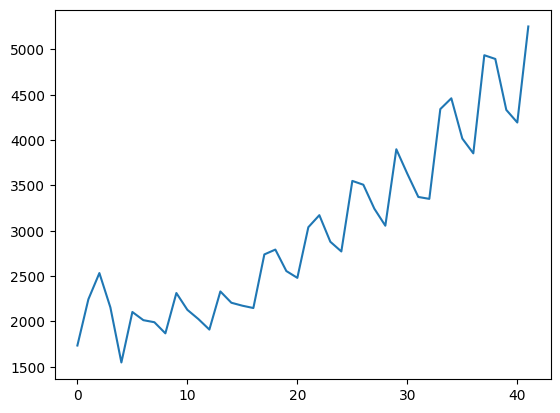

In [7]:
# the data has an exponential curve with multiplicative seasonality

ds.Sales.plot()

In [8]:
def separateQuarter(x):
    list_q = x.split('_')
    return list_q[0]

ds['quarters'] = ds['Quarter'].apply(separateQuarter)

dummy = pd.DataFrame(pd.get_dummies(ds['quarters']))
ds = pd.concat([ds,dummy], axis=1)
ds

,Quarter,Sales,quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,True,False,False,False
1,Q2_86,2244.960999,Q2,False,True,False,False
2,Q3_86,2533.804993,Q3,False,False,True,False
3,Q4_86,2154.962997,Q4,False,False,False,True
4,Q1_87,1547.818996,Q1,True,False,False,False
5,Q2_87,2104.411995,Q2,False,True,False,False
6,Q3_87,2014.362999,Q3,False,False,True,False
7,Q4_87,1991.746998,Q4,False,False,False,True
8,Q1_88,1869.049999,Q1,True,False,False,False
9,Q2_88,2313.631996,Q2,False,True,False,False


In [9]:
def caculateYear(x):
    items  = x.split('_')
    year   = items[1]
    finalyear = '19'+year
    return int(finalyear)

ds['year'] = ds['Quarter'].apply(caculateYear)
ds.head(5)

,Quarter,Sales,quarters,Q1,Q2,Q3,Q4,year
0,Q1_86,1734.827000,Q1,True,False,False,False,1986
1,Q2_86,2244.960999,Q2,False,True,False,False,1986
2,Q3_86,2533.804993,Q3,False,False,True,False,1986
3,Q4_86,2154.962997,Q4,False,False,False,True,1986
4,Q1_87,1547.818996,Q1,True,False,False,False,1987


In [10]:
t_list = [x for x in range(1,len(ds)+1)]
ds['t'] = t_list

ds['t_square'] = ds['t']*ds['t']

#log transformation
ds['log_sales'] = np.log10(ds.Sales)
ds.head(15)

,Quarter,Sales,quarters,Q1,Q2,Q3,Q4,year,t,t_square,log_sales
0,Q1_86,1734.827000,Q1,True,False,False,False,1986,1,1,3.239256
1,Q2_86,2244.960999,Q2,False,True,False,False,1986,2,4,3.351209
2,Q3_86,2533.804993,Q3,False,False,True,False,1986,3,9,3.403773
3,Q4_86,2154.962997,Q4,False,False,False,True,1986,4,16,3.333440
4,Q1_87,1547.818996,Q1,True,False,False,False,1987,5,25,3.189720
5,Q2_87,2104.411995,Q2,False,True,False,False,1987,6,36,3.323131
6,Q3_87,2014.362999,Q3,False,False,True,False,1987,7,49,3.304138
7,Q4_87,1991.746998,Q4,False,False,False,True,1987,8,64,3.299234
8,Q1_88,1869.049999,Q1,True,False,False,False,1988,9,81,3.271621
9,Q2_88,2313.631996,Q2,False,True,False,False,1988,10,100,3.364294


<Axes: xlabel='quarters', ylabel='year'>

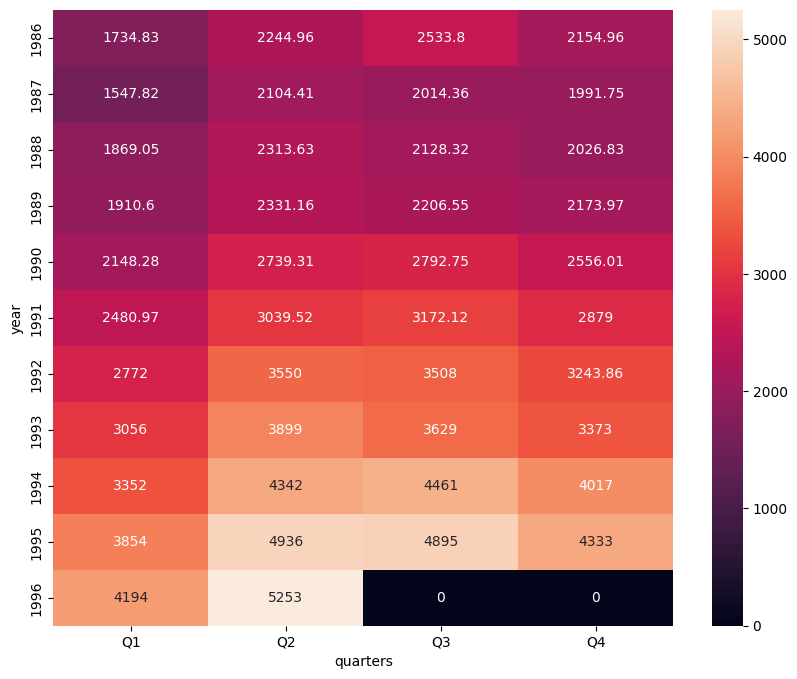

In [11]:
heatmap_ = pd.pivot_table(data=ds,values='Sales',index='year',
                                    columns='quarters',aggfunc='mean',fill_value=0)

plt.figure(figsize=(10,8))
sns.heatmap(heatmap_, annot=True, fmt='g')

<Axes: xlabel='year', ylabel='Sales'>

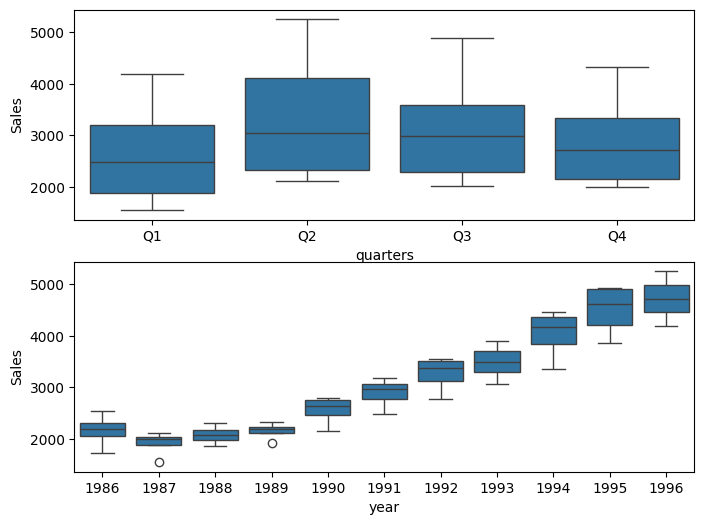

In [12]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x='quarters', y='Sales', data=ds)
plt.subplot(212)
sns.boxplot(x='year', y='Sales', data=ds)

<Axes: xlabel='year', ylabel='Sales'>

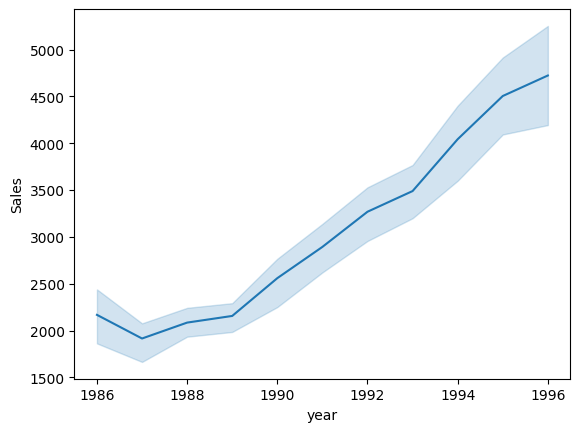

In [13]:
sns.lineplot(x='year',y='Sales',data=ds)

<Axes: xlabel='quarters', ylabel='Sales'>

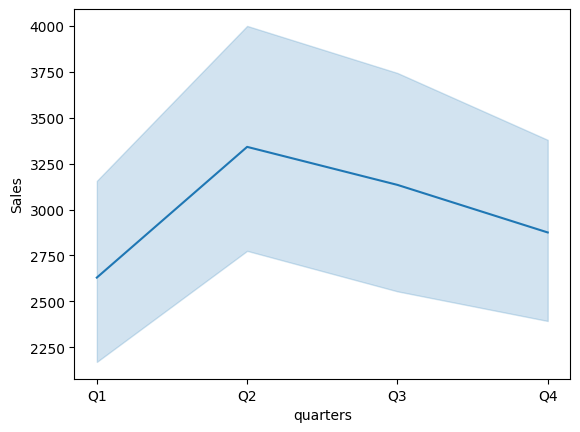

In [14]:
sns.lineplot(x='quarters',y='Sales',data=ds)

In [15]:
x_train = ds.head(30)
x_test  = ds.tail(12)
print(x_train.shape)
print(x_test.shape)

(30, 11)
(12, 11)


In [16]:
x_test

,Quarter,Sales,quarters,Q1,Q2,Q3,Q4,year,t,t_square,log_sales
30,Q3_93,3629.0,Q3,False,False,True,False,1993,31,961,3.559787
31,Q4_93,3373.0,Q4,False,False,False,True,1993,32,1024,3.528016
32,Q1_94,3352.0,Q1,True,False,False,False,1994,33,1089,3.525304
33,Q2_94,4342.0,Q2,False,True,False,False,1994,34,1156,3.637690
34,Q3_94,4461.0,Q3,False,False,True,False,1994,35,1225,3.649432
35,Q4_94,4017.0,Q4,False,False,False,True,1994,36,1296,3.603902
36,Q1_95,3854.0,Q1,True,False,False,False,1995,37,1369,3.585912
37,Q2_95,4936.0,Q2,False,True,False,False,1995,38,1444,3.693375
38,Q3_95,4895.0,Q3,False,False,True,False,1995,39,1521,3.689753
39,Q4_95,4333.0,Q4,False,False,False,True,1995,40,1600,3.636789


In [17]:
le_model         = smf.ols('Sales~t',data=x_train).fit()
predicted_linear = pd.Series(le_model.predict(pd.DataFrame(x_test['t'])))
rmse_linear      = np.sqrt(np.mean(np.array(x_test['Sales'])-np.array(predicted_linear))**2)
rmse_linear      = round(rmse_linear,2)
rmse_linear

545.51

In [18]:
#Exponential

Exp      = smf.ols('log_sales~t',data=x_train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(x_test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(x_test['log_sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp = round(rmse_Exp,2)
rmse_Exp

32.49

In [19]:
#Quadratic

Quad = smf.ols('Sales~t+t_square',data=x_train).fit()
pred_Quad = pd.Series(Quad.predict(x_test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(x_test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad = round(rmse_Quad,2)
rmse_Quad

646.27

In [20]:
#Additive seasonality

add_sea = smf.ols('Sales~Q1+Q2+Q3',data=x_train).fit()
pred_add_sea = pd.Series(add_sea.predict(x_test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(x_test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea = round(rmse_add_sea,2)
rmse_add_sea

1778.01

In [21]:
#Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3',data=x_train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(x_test[['Q1','Q2','Q3','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(x_test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad = round(rmse_add_sea_quad,2)
rmse_add_sea_quad

586.05

In [22]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',
                  data = x_train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(x_test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(x_test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea = round(rmse_Mult_sea,2)
rmse_Mult_sea

4230.92

In [23]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = x_train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(x_test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(x_test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea = round(rmse_Mult_add_sea,2)
rmse_Mult_add_sea

4224.43

In [24]:
#comparing the results
model_list                = ["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea",
                                 "rmse_Mult_add_sea"]
rmse_val_list             = [rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,
                                 rmse_Mult_add_sea]

table_rmse                = pd.DataFrame(columns=['Model','RMSE Values'])
table_rmse['Model']       = model_list
table_rmse['RMSE Values'] = rmse_val_list

table_rmse.sort_values(by=['RMSE Values'])

,Model,RMSE Values
1,rmse_Exp,32.49
0,rmse_linear,545.51
4,rmse_add_sea_quad,586.05
2,rmse_Quad,646.27
3,rmse_add_sea,1778.01
6,rmse_Mult_add_sea,4224.43
5,rmse_Mult_sea,4230.92


## Predict for new time period

In [25]:
new_data = ds.iloc[36:40,:]
new_data

,Quarter,Sales,quarters,Q1,Q2,Q3,Q4,year,t,t_square,log_sales
36,Q1_95,3854.0,Q1,True,False,False,False,1995,37,1369,3.585912
37,Q2_95,4936.0,Q2,False,True,False,False,1995,38,1444,3.693375
38,Q3_95,4895.0,Q3,False,False,True,False,1995,39,1521,3.689753
39,Q4_95,4333.0,Q4,False,False,False,True,1995,40,1600,3.636789


In [26]:
new_data = new_data.drop(columns=['Sales','log_sales','year'])

In [34]:
#picked the model with the lowest RMSE value
#training the model on the entire dataset with rmse_Mult_add_sea

model_full = smf.ols('log_sales~t++Q1+Q2+Q3',
                      data = ds).fit()

In [28]:
predicted_new = model_full.predict(new_data)
predicted_new

36    3.565228
37    3.669686
38    3.666029
39    3.631253
dtype: float64

In [29]:
new_data['forecasted_Sales'] = predicted_new
new_data

,Quarter,quarters,Q1,Q2,Q3,Q4,t,t_square,forecasted_Sales
36,Q1_95,Q1,True,False,False,False,37,1369,3.565228
37,Q2_95,Q2,False,True,False,False,38,1444,3.669686
38,Q3_95,Q3,False,False,True,False,39,1521,3.666029
39,Q4_95,Q4,False,False,False,True,40,1600,3.631253


<Axes: title={'center': 'Sales count for the year 1995'}, xlabel='quarters', ylabel='forecasted_Sales'>

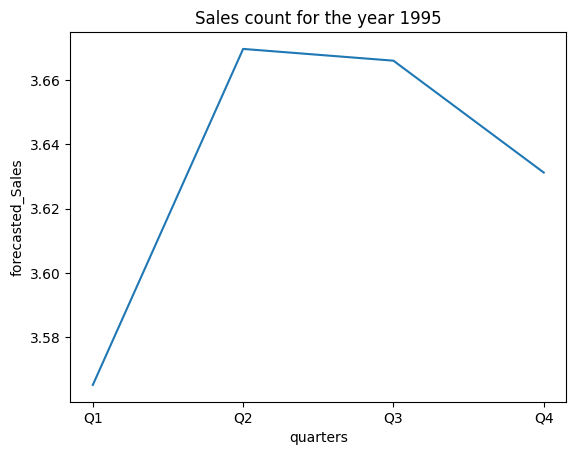

In [30]:
plt.title('Sales count for the year 1995')
sns.lineplot(x='quarters',y='forecasted_Sales',data=new_data)

In [31]:
y=new_data['forecasted_Sales']

In [32]:
# back to our anitilog values for kmow numbers of passagers

Forcastedsales=(10**y)

In [33]:
y=pd.concat([Forcastedsales,new_data.drop(['forecasted_Sales'],axis=1)],axis=1)
y

,forecasted_Sales,Quarter,quarters,Q1,Q2,Q3,Q4,t,t_square
36,3674.749740,Q1_95,Q1,True,False,False,False,37,1369
37,4673.966165,Q2_95,Q2,False,True,False,False,38,1444
38,4634.780289,Q3_95,Q3,False,False,True,False,39,1521
39,4278.124557,Q4_95,Q4,False,False,False,True,40,1600
